<img src='logo.png' style='display: block;height: 61px;float: left;padding: .75rem 1.25rem;'>

# Prueba 2: Analizado los crímenes en la Ciudad de Nueva York

## Preliminares
___

### Enunciado:

En esta ocasión trabajaremos con datos públicos del departamento de policía de New York. El dataset es  llamado `stop_and_frisk_data`  y  contiene información sobre interrogaciones y detenciones realizadas por el departamento de policia de NY en la vía pública. El diccionario de atributos se encuentra en el archivo [2009 SQF File Spec.xlsx](./2009_SQF_File_Spec.xlsx).

Para todo nuestro estudio utilizaremos los datos correspondientes al año 2009 como conjunto de entrenamiento y los datos del 2010 como conjunto de pruebas. Hay que hacer notar que los datos que estamos utilizando son un muestreo del 1% de la cantidad de registros reales que contiene el dataset, esta decisión fue tomada debido a los largos tiempos de entrenamiento y procesamiento que requiere el volumén de datos reales.

* Crea una carpeta de trabajo y guarda todos los archivos correspondientes (notebook, archivosauxiliares y csv).

* Una vez terminada la prueba, comprime la carpeta y sube el `.zip` a la seccióncorrespondiente.

### Objetivos

Para alcanzar el objetivo general, su trabajo se puede desagregar en los siguientes puntos:

1. Dado la gran cantidad de atributos, se le entrega un script `preproc_nyc_sqf.py` que normaliza la cantidad de atributos. Haga uso de la función `create_suitable_dataframe` para igualar el benchmark de los atributos.


2. Debe analizar de forma exploratoria los atributos. Reporte la cantidad de datos perdidos y presente su esquema de recodificación.


3. Generar un modelo predictivo que __condicional__ a las características medidas del sospechoso, prediga si un determinado procedimiento concluirá en un arresto o no. Para ello, guíase por los siguentes lineamientos:
  * Entrene por lo menos 1 modelo que sea capaz de predecir si se producirá un arresto o no. Una vez que encuentre un modelo satisfactorio, reporte al menos dos métricas de desempeño.
  * Refine aquellos atributos relevantes. Encuentre por lo menos 30 atributos que explique la importancia relativa y ordénelos por orden de importancia.
  * Finalmente, reporte la probabilidad que un individuo sea arrestado en uno de los cinco barrios, condicional al género y condicional a la raza.


4. Genere al menos cinco modelos predictivos que permitan determinar si el procedimiento policial concluirá en alguna acción violenta.
  * Para ello, debe generar un nuevo atributo como vector objetivo que indique cuándo hubo violencia o no. Éste debe ser creado a partir de atributos existentes que indiquen el tipo de violencia. El detalle de los atributos que se consideran violentos se detalla a continuación:
```python
'pf_hands', 'pf_wall', 'pf_grnd', 'pf_drwep', 'pf_baton', 
'pf_hcuff', 'pf_pepsp', 'pf_other'
```


5. Seleccione los 2 mejores modelos, serialicelos y envíelos a evaluación. Recuerde que el modelo serializado debe ser posterior al `fit` , para poder ejecutar `predict` en los nuevos datos.


6. La evaluación del modelo será realizada en función a un conjunto de datos reservados al cual no tienen acceso.

> Para resolver el problema planteado, "determinar si un procedimiento concluirá en un arresto o no", vamos a usar técnicas y algoritmos de clasificación. Tenemos todos los elementos para resolver un problema de aprendizaje supervisado, ya que tenemos la variable dependiente __arstmade__ (se realizó la una detención) y se plantea como un atributo discreto, en este caso binario. Además disponemos de una base de datos con suficientes muestras. Para entrenar el modelo usaremos los datos del año 2009.
>
> Inicialmente nos vemos tentados a usar una solución desde la econometría, no obstante las herramientas disponibles para machine learning nos permitiran navegar sobre soluciones y encontrar un modelo de la solución balanceado entre el sesgo y la varianza. Dada la cantidad de atributos nominales y la bondad evaluada en los metodos de __ensambles__ vamos a apostar por obtener buenos resultados con __Random Forest__, __Adaptive Boosting__ y __Gradient Boosting__, no obstante y para efectos de comparacón de modelos, vamos a implementar el algoritmo __SVC__ con Kernel RBF y __LDA__ (análisis lineal discriminante) o __QDA__ (análisis cuadrático discriminante).
>
> Para __validar la solución__ extraeremos medidas desde la matriz de confusión, revisaremos __accuracy__, __Precision__ y __Recall__, luego revisaremos la media armónica entre Precision y Recall (__F1__). Para terminar usaremos el despliegue de la curva __ROC__ para justificar la bondad del modelo. Es decir, explicar que % adicional explica el modelo por sobre una asignación aleatorea (0.5). Para validar el modelo usaremos datos del __2010__, así revisamos la capacidad de predicción empírica del modelo.

### Vector objetivo:
>
> Para el objetivo 3 nuestro vector objetivo arstmade (se realizó o no la detención).
>
> Para el objetivo 4 nuestro vector objetivo es una nueva variable que determinará si el procedimiento policial cloncluirá en una acción violenta.

### Tipo de problema:
>
> Estamos frente a un problema de clasifición con información previa sobre las clases y atributos de un procedimiento policial. En este sentido, tenemos la data para abordar la solución con herramientas de clasificación supervisada.

### Modelos:

> Los hiperparámetros de los modelos serán calibrados mediante búsqueda de grilla con validaciones cruzadas (GridSeachCV), en la medida que se requiera. 
>
> __Gradient Boosting__: 
>  + param_grid={'learning_rate': [0.01, 0.1, 0.5], 'n_estimators': [50, 100, 500, 1000, 2000]}
>  + 5 Validaciones Cruzadas
>
> __Adaptive Boosting__: 
>  + param_grid={'learning_rate': [0.01, 0.1, 0.5],'n_estimators': [50, 100, 500, 1000, 2000], 'subsample': [0.1,0.5,0.9]}
>  + 5 Validaciones Cruzadas
>
> __Random Forest__: 
>  + n_estimators = range(20, 1000, 50)
>  + max_features="log2"
>  + oob_score = True
>
> __SVC__ con Kernel __RBF__:
>  + param_grid = {'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000], 'gamma': [0.0000001, 0.0001, 0.001, 0.01, 0.1, 1, 10]}
>  + 5 Validaciones Cruzadas
>
> __QDA__ (análisis cuadrático discriminante): Es probable que dejemos iniciado el hiperparámetro priors, con la probabilidad a priori del 2009.
>
> __BernoulliNB__ (para objetivo 3) o __MultinomialNB__ (para objetivo 4): Sin modificar hiperparámetros.

### Métricas:
> * Accuracy
> * Precision
> * Recall
> * fi_score
> * ROC

### Preprocesamiento
>
> Para el caso de los atributos categoricos se binarizarán o se codificarán las etiquetas a numeros y en caso de que los atributos continuos estén desbalanceados procederemos a recodificarlos con su logaritmo y en caso de requerir, estandarizaremos los valores. Adicionalmente usaremos la función `create_suitable_dataframe` para igualar el benchmark de los atributos.

## Aspectos computacionales
___

> Se utilizan librerías bases para el tratamiento de datos y algunos aspectos básicos de cálculo y gráficos.

In [1]:
# Se importa libreria para el manejo de bases de datos
import pandas as pd
# Se importa libreria para el manejo de operaciones de cálculo
import numpy as np
# Se importa libreria para el manejo de gráficos
import matplotlib.pyplot as plt
# Se importa libreria para manejo de funciones estadisticas y probabilidades
import seaborn as sns
# Librería para visualizar patrones de datos perdidos
import missingno as msngo
# Se importa libreria para el menejo de warning
import warnings
# Se importa libreria para el trabajo de expresiones reguilares
import re

> Definimos algunos aspectos de ambiente y valores por defecto de visualización.

In [2]:
# Por defecto, matplotlib crea una figura en una ventana separada.
# podemos hacer que las figuras aparezcan en línea dentro del notebook; lo hacemos ejecutando:
%matplotlib inline
# Se ignoran los warning para evitar suciedad en la ejecución
warnings.filterwarnings(action='ignore')
# Se define el estilo de gráficos a usar
plt.style.use('seaborn-pastel')
# Se define el tamaño de los paños de los gráficos por defecto
plt.rcParams['figure.figsize'] = (14, 8)
# Dado que vamos a supervisar datos no limitaremos la cantidad de columnas a mostrar 
# en el despliegue del dataframe
pd.options.display.max_columns = None

> Se utilizan librerías de __sklear__ para resolver el problema desde el enfoque de machine learning

In [3]:
# Método de ensamble secuencial, corrige mediante la función de pérdida usando el descenso por el gradiente.
from sklearn.ensemble import GradientBoostingClassifier
# Método de ensamble secuencial, corrige por las tasas de clasificaciones incorrectas
from sklearn.ensemble import AdaBoostClassifier
# Método de ensamble paralelo, aplica bootstrapping por fila y columnas. 
from sklearn.ensemble import RandomForestClassifier
# Método de clasificación mediante la maximización de margen de clases.
from sklearn.svm import SVC
# Método de Análisis cuadrático discriminante, los atributos tienen una forma cuadrátio.
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
# Método que implementa Bayes ingenuo para el caso dos clases y multiclase.
from sklearn.naive_bayes import BernoulliNB, MultinomialNB
# Métricas para evaluar modelos de clasificación
from sklearn.metrics import classification_report, roc_curve, roc_auc_score
# Métodos de selección de muestras
from sklearn.model_selection import GridSearchCV, train_test_split
# Metodo para el procesamiento de los datos en una tuberias
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, LabelEncoder

> Se utiliza la librería __pickle__ que contiene la función dump, que permite guardar el modelo desarrollado. 

In [4]:
# Método para hacer dump del modelo y objetos
import pickle

> Se utiliza <strong>librería propia</strong> que continen funciones auxiliares, necesarias para el desarrollo de desafíos.

In [5]:
# Se importa libreria con funciones auxiliares
import ancilliary_funcs as afx

> Se utiliza <strong>librería helpers.py</strong> que continen funciones auxiliares, necesarias para el desarrollo de desafíos.

In [51]:
import helpers as hlp

> Se utiliza __librería preproc_nyc_sqf.py__ provista para abordar temas de procesamiento de atributos.

In [7]:
import preproc_nyc_sqf as preproc

## Análisis Exploratorio
___

> __Cargamos la base de datos__

In [8]:
# Se carga la base de datos y se elimina la columna 'Unnamed: 0' que no aporta valor al análisis.
# Datos para el entrenamiento
df_train_raw = pd.read_csv('2009_1perc.csv').drop(columns='Unnamed: 0')
# Datos para la validación
df_test_raw = pd.read_csv('2010_1perc.csv').drop(columns='Unnamed: 0')

In [9]:
# Inspeccionamos los datos
df_train_raw.sample(5)

,year,pct,ser_num,datestop,timestop,recstat,inout,trhsloc,perobs,crimsusp,perstop,typeofid,explnstp,othpers,arstmade,arstoffn,sumissue,sumoffen,compyear,comppct,offunif,officrid,frisked,searched,contrabn,adtlrept,pistol,riflshot,asltweap,knifcuti,machgun,othrweap,pf_hands,pf_wall,pf_grnd,pf_drwep,pf_ptwep,pf_baton,pf_hcuff,pf_pepsp,pf_other,radio,ac_rept,ac_inves,rf_vcrim,rf_othsw,ac_proxm,rf_attir,cs_objcs,cs_descr,cs_casng,cs_lkout,rf_vcact,cs_cloth,cs_drgtr,ac_evasv,ac_assoc,cs_furtv,rf_rfcmp,ac_cgdir,rf_verbl,cs_vcrim,cs_bulge,cs_other,ac_incid,ac_time,rf_knowl,ac_stsnd,ac_other,sb_hdobj,sb_outln,sb_admis,sb_other,repcmd,revcmd,rf_furt,rf_bulg,offverb,offshld,sex,race,dob,age,ht_feet,ht_inch,weight,haircolr,eyecolor,build,othfeatr,addrtyp,rescode,premtype,premname,addrnum,stname,stinter,crossst,aptnum,city,state,zip,addrpct,sector,beat,post,xcoord,ycoord,dettypcm,linecm,detailcm
4638,2009,84,2098,6242009,334,A,O,P,5.0,FEL,2,R,Y,Y,N,,N,,0,0,Y,,Y,N,N,N,N,N,N,N,N,N,Y,N,N,N,N,N,N,N,N,N,N,N,Y,N,Y,N,N,Y,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,868,868,N,N,,,M,B,12311900,20,5,6,140,BK,BR,T,,L,,,STREET,1,METROTECH CENTER,MYRTLE AVENUE,FLATBUSH AVENUE EXTENSION,,BROOKLYN,,,84,F,,15,0987782,0191639,CM,1,20
353,2009,14,3128,3232009,1355,1,I,T,2.0,GRAND LARCENY,1,P,Y,N,N,,N,,0,0,Y,,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,Y,N,N,N,N,Y,N,N,N,Y,N,N,N,Y,Y,Y,N,N,N,N,N,N,N,872,872,N,N,,,M,B,8051964,44,5,11,225,BA,BR,H,,L,,,,,,8 AVENUE,WEST 42 STREET,,MANHATTAN,,,14,H,11,,0987078,0215157,CM,1,45
2594,2009,30,738,1312009,2334,1,O,P,5.0,MISD,5,P,Y,N,N,,N,,0,0,Y,,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,Y,N,N,N,N,N,N,N,Y,N,N,Y,N,N,N,N,N,N,Y,N,N,N,N,N,N,N,N,174,174,N,N,,,M,Q,10021987,21,6,0,160,BR,GY,M,,L,,,STREET,,,BROADWAY,WEST 139 STREET,,MANHATTAN,,,30,A,,,0997198,0238992,CM,1,28
3487,2009,25,886,1302009,1539,1,I,T,4.0,PETIT LARCENY,1,P,Y,N,Y,PL 155.25,N,,0,0,N,,Y,Y,N,N,N,N,N,N,N,N,Y,N,N,N,N,N,Y,N,N,N,N,N,N,Y,N,N,N,N,Y,N,N,N,N,N,N,N,N,N,N,N,N,N,Y,N,N,N,N,N,N,N,Y,863,863,N,N,V,S,M,B,3071983,25,6,2,200,BK,BR,H,,L,,,MEZZANINE POST 0402,,,LEXINGTON AVENUE,EAST 116 STREET,,MANHATTAN,,,25,B,,,1000414,0230243,CM,1,68
856,2009,44,927,2042009,5,A,O,P,1.0,FEL,5,P,Y,N,N,,N,,0,0,Y,,Y,N,N,N,N,N,N,N,N,N,Y,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,Y,N,Y,N,N,N,N,N,N,Y,Y,N,N,N,N,N,N,N,44,44,Y,N,,,M,B,11261982,26,6,1,190,BK,BK,M,,L,,,STREET,,,3 EAST,MARCY PLACE,,BRONX,,,44,,,,,,CM,1,20


In [10]:
# Inspeccionamos los datos
df_test_raw.sample(5)

,year,pct,ser_num,datestop,timestop,recstat,inout,trhsloc,perobs,crimsusp,perstop,typeofid,explnstp,othpers,arstmade,arstoffn,sumissue,sumoffen,compyear,comppct,offunif,officrid,frisked,searched,contrabn,adtlrept,pistol,riflshot,asltweap,knifcuti,machgun,othrweap,pf_hands,pf_wall,pf_grnd,pf_drwep,pf_ptwep,pf_baton,pf_hcuff,pf_pepsp,pf_other,radio,ac_rept,ac_inves,rf_vcrim,rf_othsw,ac_proxm,rf_attir,cs_objcs,cs_descr,cs_casng,cs_lkout,rf_vcact,cs_cloth,cs_drgtr,ac_evasv,ac_assoc,cs_furtv,rf_rfcmp,ac_cgdir,rf_verbl,cs_vcrim,cs_bulge,cs_other,ac_incid,ac_time,rf_knowl,ac_stsnd,ac_other,sb_hdobj,sb_outln,sb_admis,sb_other,repcmd,revcmd,rf_furt,rf_bulg,offverb,offshld,sex,race,dob,age,ht_feet,ht_inch,weight,haircolr,eyecolor,build,othfeatr,addrtyp,rescode,premtype,premname,addrnum,stname,stinter,crossst,aptnum,city,state,zip,addrpct,sector,beat,post,xcoord,ycoord,dettypcm,linecm,detailcm
4485,2010,75,10185,5192010,11,A,O,P,1,GLA,5,P,Y,N,N,,N,,0,0,Y,,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,Y,N,N,N,N,N,N,N,Y,N,N,N,N,N,N,N,75,75,N,N,,,M,B,8111975,34,5,10,160,BK,BR,M,,L,,,STREET,,,BLAKE AVENUE,VERMONT STREET,,BROOKLYN,,,75,G,,,1013956,182708,CM,1,46
1217,2010,61,135,1112010,1210,A,O,P,15,ROBBERY,5,V,Y,N,N,,N,,0,0,N,,Y,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,Y,N,N,Y,Y,N,N,N,Y,Y,Y,Y,Y,N,N,N,N,Y,N,Y,N,N,N,N,N,N,61,61,Y,N,V,S,M,B,1071993,17,5,7,160,BK,BR,T,,L,,,STREET,,,AVENUE W,EAST 28 STREET,,BROOKLYN,,,61,E,7,,1000091,156314,CM,1,85
3538,2010,18,1959,7232010,1125,1,O,P,20,GRAND LARCENY,5,P,Y,Y,N,,N,,0,0,N,,Y,N,N,N,N,N,N,N,N,N,Y,N,N,N,N,N,Y,N,N,N,Y,Y,N,N,N,N,N,N,Y,N,N,N,N,Y,N,N,N,N,N,N,N,N,Y,Y,N,N,N,N,N,N,N,18,18,Y,N,V,S,M,B,12311900,26,6,1,215,BK,BR,M,,L,,,STREET,,,PARK AVENUE,EAST 50 STREET,,MANHATTAN,,,18,A,,,991458,215139,CM,1,45
5460,2010,13,1044,2242010,1415,1,I,T,3,G/L,3,P,Y,N,N,,N,,0,0,Y,,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,Y,N,N,N,N,Y,N,Y,N,Y,N,N,N,N,N,N,N,N,N,N,N,N,N,863,863,N,N,,,M,B,11171965,44,5,9,158,BK,BR,M,,L,,,VIC MVM POST 0418,,,UNION SQUARE EAST,EAST 14 STREET,,MANHATTAN,,,13,C,,,,,CM,1,45
1850,2010,72,3228,9042010,30,A,I,P,2,GLA,5,V,Y,N,N,,N,,0,0,Y,,Y,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,Y,Y,N,N,N,N,N,N,N,N,139,139,Y,N,,,M,Q,8081980,30,5,6,150,BK,BR,M,,L,,,STREET,,,4 AVENUE,48 STREET,,BROOKLYN,,,72,E,8,,981083,175211,CM,1,46


> __Dimensión de la base de datos__

In [11]:
# Revisamos dimensiones de la base de datos de entrenamiento
df_train_raw.shape

(5812, 111)

In [12]:
# Revisamos dimensiones de la base de datos de validación
df_test_raw.shape

(6013, 111)

Las basse de datos se componen 110 atributos y el vector de clases [arstmade]. Para el caso de los datos de entrenamiento contamos con 5812 registros y 6013 para el caso de validación.

> __Revisamos datos perdidos__

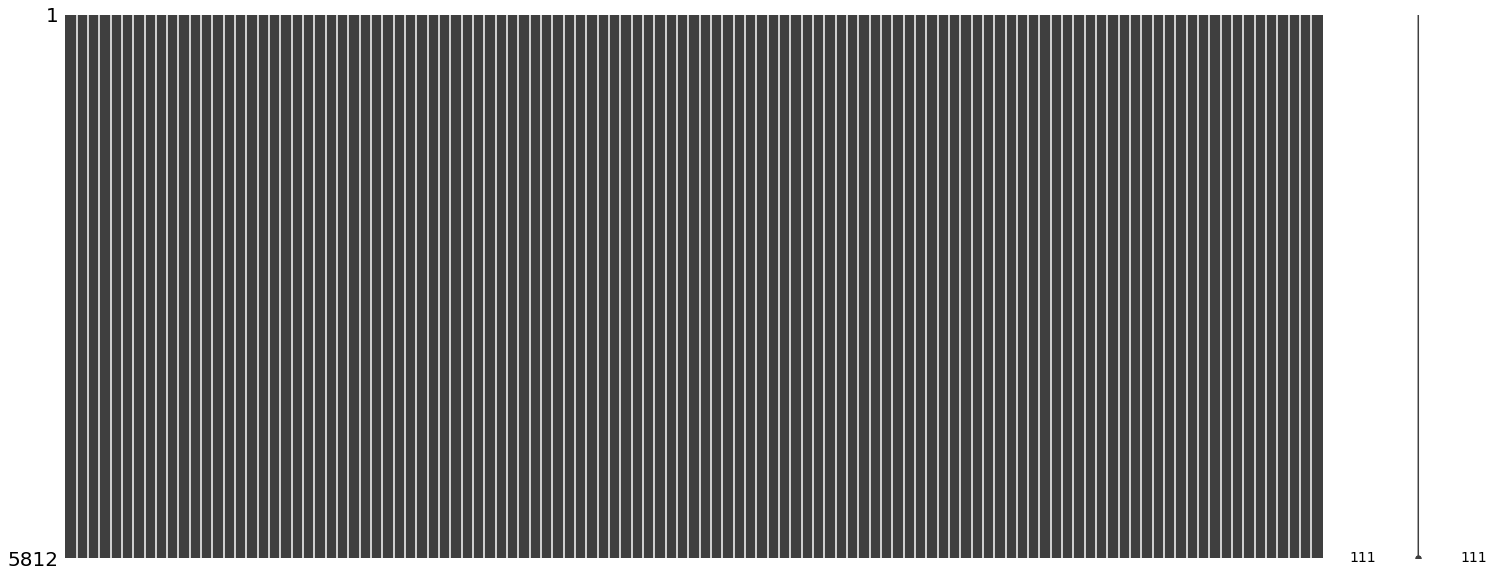

In [13]:
# Revisamos datos perdidos en DF de entrenamiento
msngo.matrix(df_train_raw)

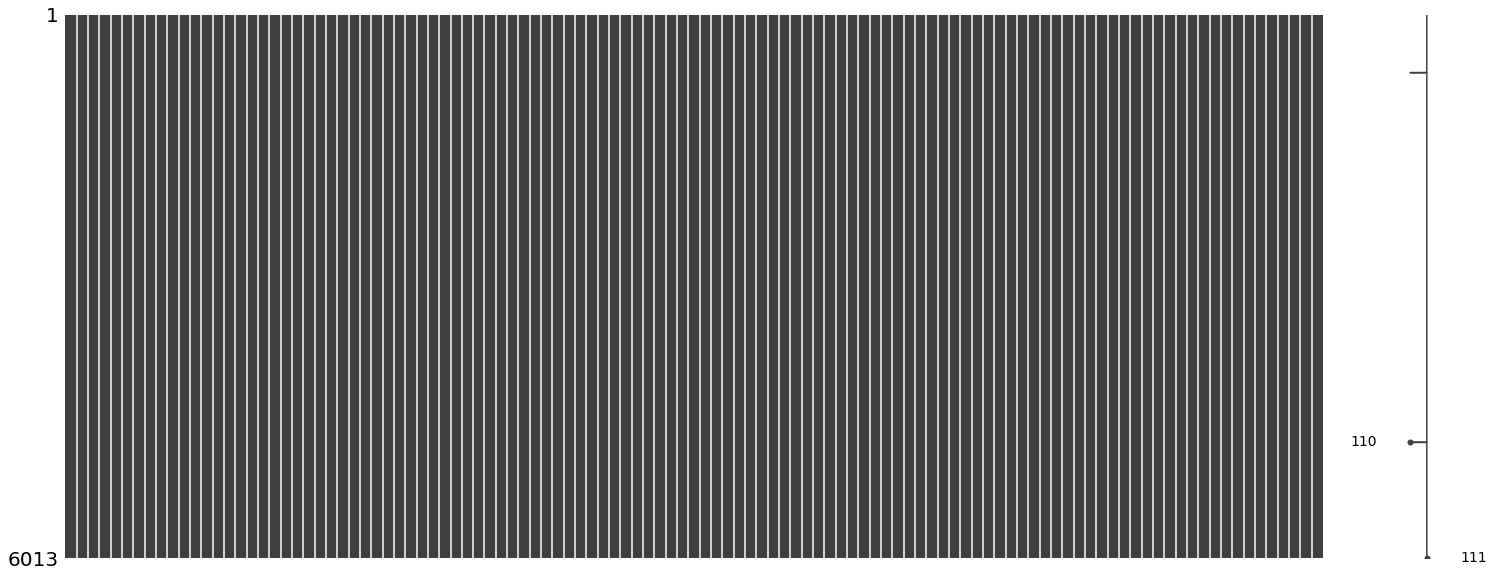

In [14]:
# Revisamos datos perdidos en DF de validación
msngo.matrix(df_test_raw, )

Revisando los valores NaN, podemos ver que todas las columnas no presentan datos perdidos, para efectos visuales se revisan los datos perdidos con la el método matrix() de msngo.

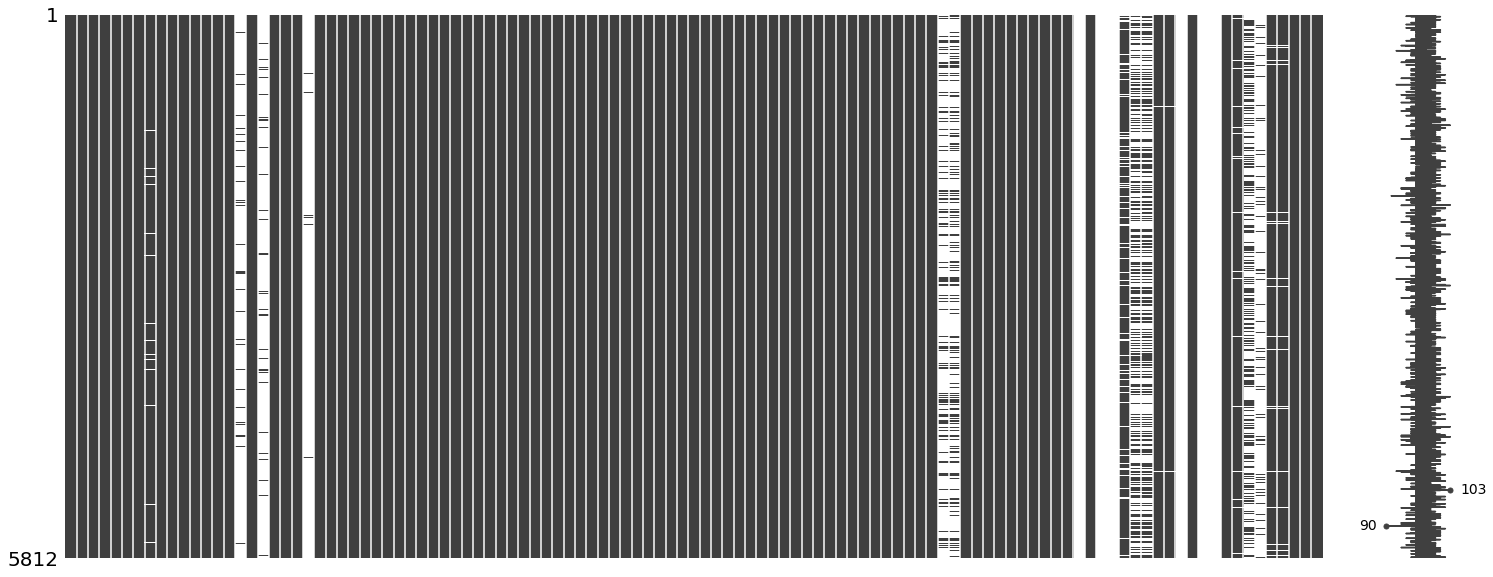

In [15]:
msngo.matrix(df_train_raw.replace('', np.nan).replace(' ', np.nan))

Ahora bien, si reemplazamos los datos vacíos como '' y ' ' por NaN se aprecia que efectivamente si tenemos columnas que presentan datos vacíos y vamos para disponer de un set de datos aptos para el entrenamiento vamos a pre-procesar con la función `create_suitable_dataframe` disponible en el archivo provisto para resolver este desafío `preproc_nyc_sqf.py`

> __Pre-procesamiento de atributos__

Se crea un dataframe apto para entrenamiento de acuerdo a normas básicas de limpieza de datos faltantes,  transformación de etiquetas nulas en variables categóricas y crea atributos sinteticos de edad del sospechoso y conversión de distancia a sistema metrico.


<div style='color: green; font-weight: bold'>
<br>
    
Se realizaron modificaciones a la función `create_suitable_dataframe`, ya que al momento de aplicarla a distintos DataFrames las columnas de atributos resultantes variaban y esto hace imposible poder procesar en las etapas de predicción

Se incorporó el parámetro `force_object`, para indicarle a la función cuales columnas se forzarán a ser de tipo object y así evitar los problemas de la inferencia de tipos de datos.
</div>

__force_object__: Se verifica en procesamientos de revisión que estas columnas en ocasiones se interpretan como numero y en otros caso como object, dependiendo si se incluyen valores vacíos. Para homologar la interpretación se fijan como object.

In [16]:
force_object = ['addrpct', 'detailcm']

__force_delete__: Se verifica en procesamientos de revisión que estas columnas presentam variaciones que no garantiza estabilidad de homologación del DataFrame,  por ejemplo asltweap en el DataFrame de entrenamiento presenta 5811 registros con el valor N y 1 con el valor 1, esto es como tener una sóla clase y por ende se puede eliminar.

In [17]:
force_delete = ['asltweap', 'post']

In [18]:
# Se pre-procesa el DataFrame de entrenamiento
df_train, cat_col_train, num_col_train = preproc.create_suitable_dataframe(df_train_raw, 
                                                                           force_object = force_object, 
                                                                           force_delete = force_delete)

In [19]:
# Se pre-procesa el DataFrame de validación
df_test, cat_col_test, num_col_test = preproc.create_suitable_dataframe(df_test_raw, 
                                                                        force_object = force_object, 
                                                                        force_delete = force_delete)

In [20]:
df_train.shape

(4636, 75)

In [21]:
df_test.shape

(4747, 75)

In [22]:
if sum(df_train.columns == df_test.columns)==df_train.shape[1]==df_test.shape[1]:
    print("Los DataFrame tienen las mismas columnas")

Los DataFrame tienen las mismas columnas


Dada la experiencia con la función `create_suitable_dataframe` estamos verificando que tanto el set de datos de entrenamiento y de validación queden con las mismas columnas despues de pre-procesar.

Las basse de datos ahora se componen 73 atributos y el vector de clases [arstmade]. Para el caso de los datos de entrenamiento quedamos con 4636 registros y 4747 para el caso de validación.

> __Vector Objetivo__

Revisamos nuestro __vector objetivo__ arstmade (Y si el procedimiento resultó en una detención, 0 de los contrario)

In [23]:
# Balance de clase datos de entrenamiento, vector objetivo
df_train.arstmade.value_counts('%')

N    0.939387
Y    0.060613
Name: arstmade, dtype: float64

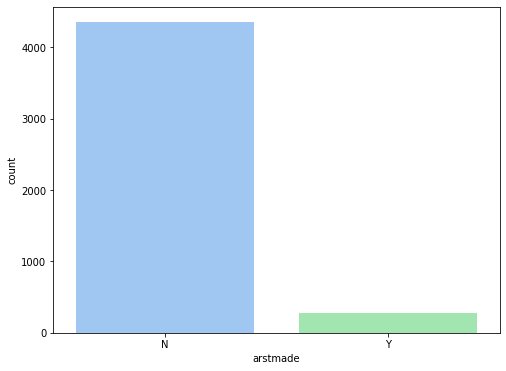

In [24]:
# Revisamos gráficamente el desbalance de clases de nuestro vector objetivo
plt.figure(figsize=(8,6))
sns.countplot(x='arstmade', data=df_train)

In [25]:
# Balance de clase datos de validación, vector objetivo
df_test.arstmade.value_counts('%')

N    0.934906
Y    0.065094
Name: arstmade, dtype: float64

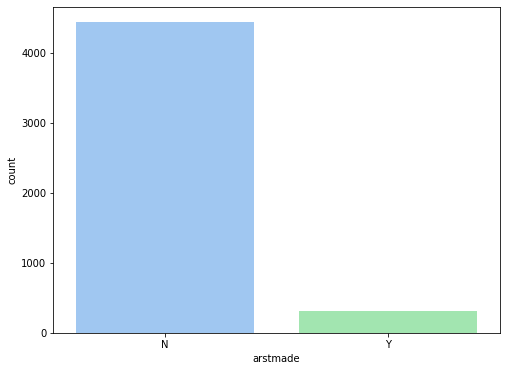

In [26]:
# Revisamos gráficamente el desbalance de clases de nuestro vector objetivo
plt.figure(figsize=(8,6))
sns.countplot(x='arstmade', data=df_test)

Podemos observar en ambas bases de datos, que hay un desbalanceo de clases en la muestra ya que vemos que hay más de un 93% de datos etiquetados con la __clase N__ (procedimiento no resultó una detención) y menos de un 7% con la __clase Y__ (procedimiento resultó una detención).

> __Atributos__

__Revisemos los atributos numéricos__:

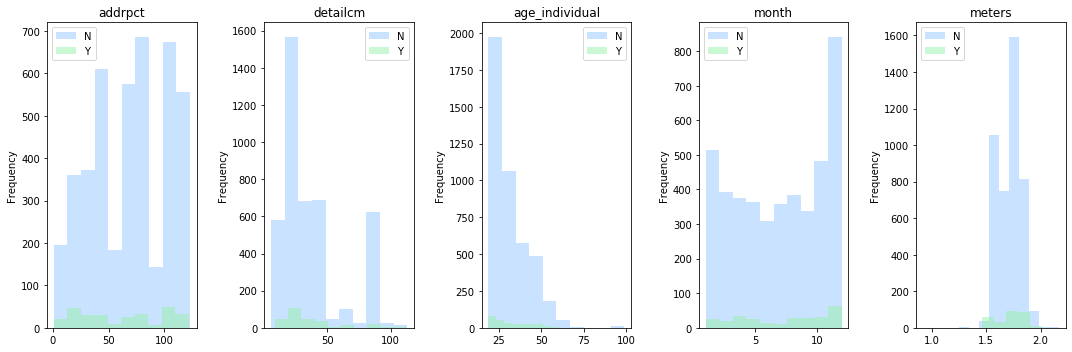

In [27]:
plt.subplots(figsize= (15, 5))
# Seleccionamos todos los atributos numericos
cols_num = df_train.drop(columns=['arstmade']).select_dtypes(exclude=['object']).columns
for i, (colname, serie) in enumerate(df_train.loc[:,cols_num].iteritems()):
    plt.subplot(1, 5, i + 1)
    df_train.groupby('arstmade')[colname].plot(kind='hist', alpha=.5)
    plt.legend(df_train['arstmade'].unique())
    plt.title(colname)
    plt.tight_layout()


Se observa que los atributos numéricos addpct, detailcm, age_individual, month y meters tienen mayor consentración en la clase N de nuestro vector objetivo, no obstante la forma en que se distribuyen los datos en ambas cases es similar, lo que se puede apreciar en un gráfico de Kernel.

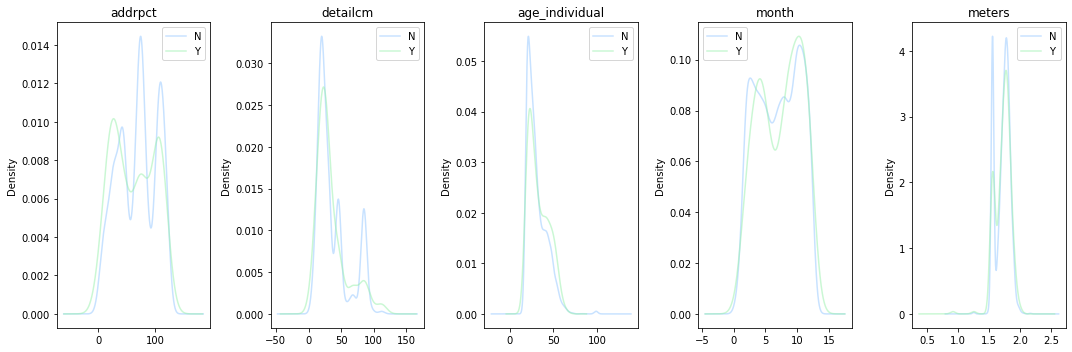

In [28]:
plt.subplots(figsize= (15, 5))
cols = df_train.drop(columns=['arstmade']).select_dtypes(exclude=['object']).columns
for i, (colname, serie) in enumerate(df_train.loc[:,cols].iteritems()):
    plt.subplot(1, 5, i + 1)
    df_train.groupby('arstmade')[colname].plot(kind='kde', alpha=.5)
    plt.legend(df_train['arstmade'].unique())
    plt.title(colname)
    plt.tight_layout()

El caso del atributo age_individual está concentrado en torno a los 30 años. En la etapa de __Feature engineering__ veremos si es necesario aplicar el logaritmo a este atributo para balancear la distribución.

__Revisemos los atributos categóricos__:

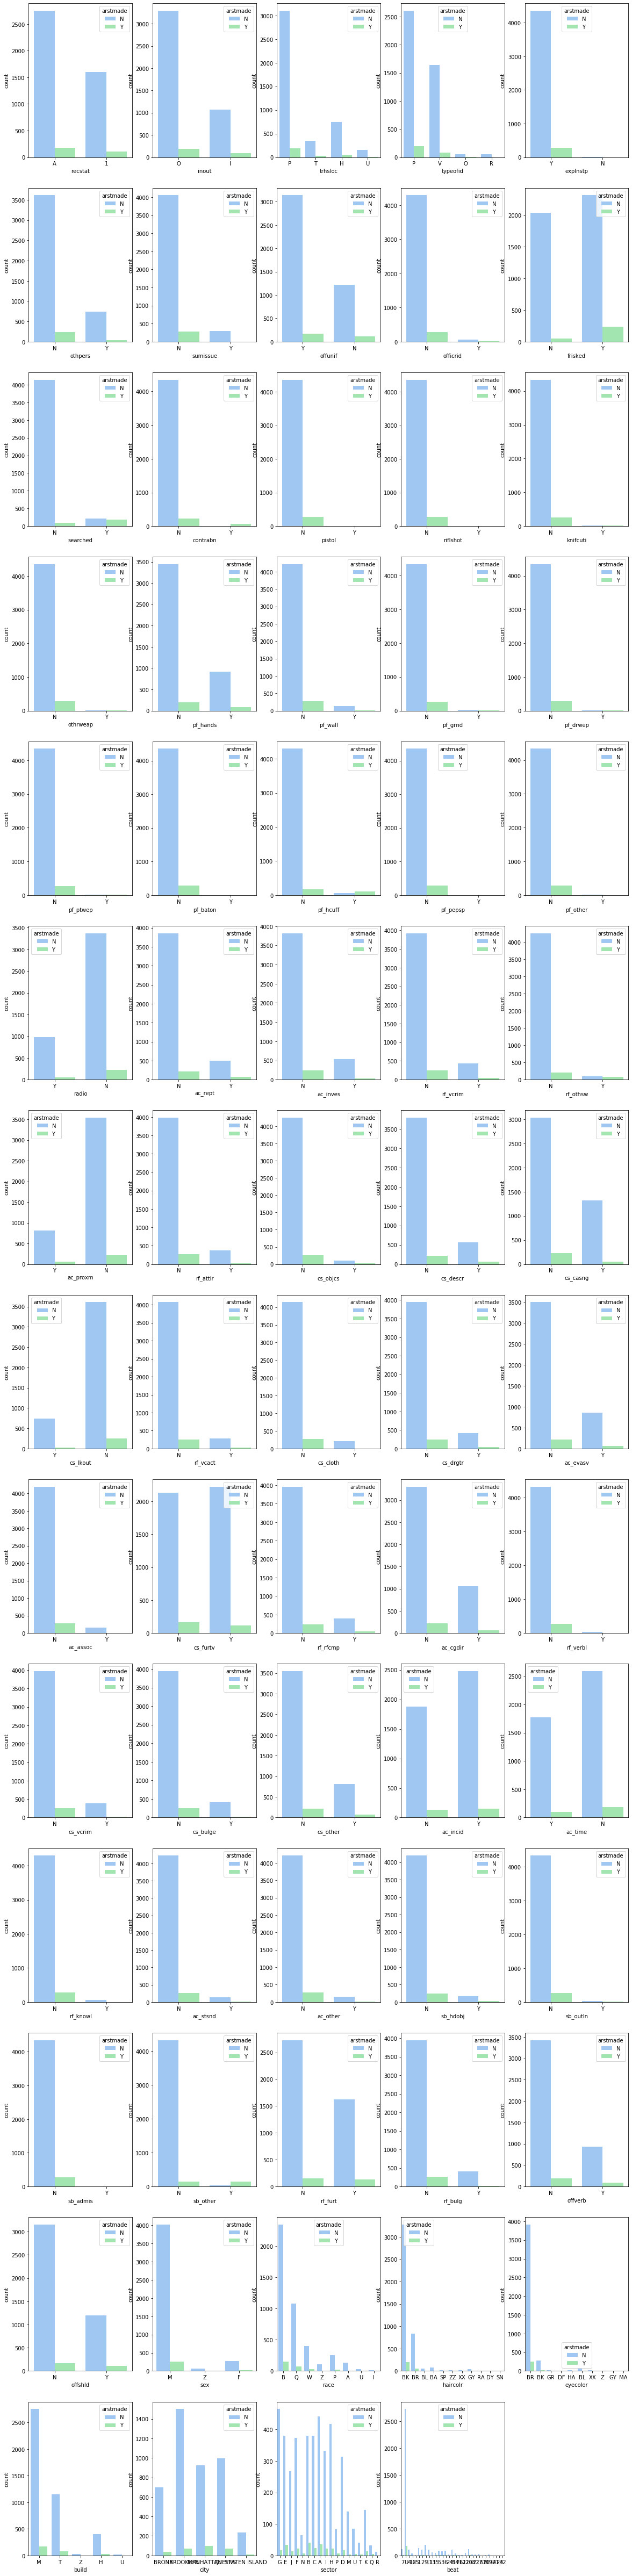

In [29]:
# Generamos una grilla con los gráficos de distribución del resto de atributos.
plt.figure(figsize=(20,100))
# Seleccionamos todos los atributos categóricos
cols_cat = df_train.drop(columns=['arstmade']).select_dtypes(include=['object']).columns
col = 5
row = (df_train.shape[1]//col) + 1
# Recorremos el listado de atributos.
for index, (colname, serie) in enumerate(df_train.loc[:, cols_cat].iteritems()):
    plt.subplot(row, col, index+1)
    # Se usa un grafico de ocurrencias
    if serie.dtype == 'object':
        sns.countplot(x= colname, data=df_train, hue='arstmade')

In [30]:
# Revisamos que atributos tienen mas de 2 clases.
cols_cat_multiclass = [i for i in df_train.loc[:, cols_cat] if len(df_train[i].value_counts())>2]
print(cols_cat_multiclass)

['trhsloc', 'typeofid', 'sex', 'race', 'haircolr', 'eyecolor', 'build', 'city', 'sector', 'beat']


También se observa que los atributos categóricos tienen mayor consentración en la clase N de nuestro vector objetivo. La mayoria de los atributos son binarios, excepto __trhsloc__, __typeofid__, __sex__, __race__, __haircolr__, __eyecolor__, __build__, __city__, __sector__, __beat__, que en sí representan atributos particulares de un sospechoso.

In [31]:
df_train['sex'].value_counts()

M    4277
F     291
Z      68
Name: sex, dtype: int64

por un tema de códigos me llama la atención el código Z, será la representación de zombie?.

## Feature engineering
___

Vamos a duplicar el DataFrame para los dos casos que vamos a modelar:

In [32]:
# Caso 1, donde el vector objetivo es arstmade
df_train_1 = df_train.copy()

In [33]:
# Caso 2, donde el vector objetivo determinará si el procedimiento policial cloncluirá en una acción violenta.
df_train_2 = df_train.copy()

En ambos casos estamos frente a un problema de clasifición con información previa sobre las clases y atributos de un procedimiento policial. En este sentido, tenemos la data para abordar la solución con herramientas de clasificación supervisada.

> __Vector Objetivo__ (arstmade)

Dado que el vector objetivo para delerminar si un procedimiento concluye en una detención es binario (Y o N), vamos a proceder a a binarizar arstmade. Si bien tenemos muchas alternativas para realizar este procedimiento (LabelEncoder, pd.get_dummies, etc), vamos a proceder con la forma más ilustrativa.

In [34]:
# Revisamos nuevamente el balance de la clase para determinar que clase asignamos valor 1
df_train_1['arstmade'].value_counts()

N    4355
Y     281
Name: arstmade, dtype: int64

In [35]:
# Vamos a nombrar un nuevo dataframe con el primer vector objetivo arstmade, con la clase Y=1
df_train_1['arstmade_bin'] = np.where(df_train_1['arstmade']=='Y', 1, 0)

# Eliminamos la columna original
df_train_1.drop(columns='arstmade', inplace=True)

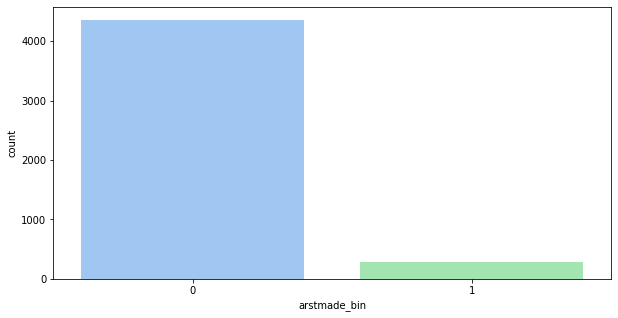

In [36]:
plt.figure(figsize=(10, 5))
sns.countplot(df_train_1['arstmade_bin'])

In [37]:
# Mantenemos la estructura de datos
df_train_1.shape

(4636, 75)

> __Modelo__ (arstmade)

En este caso se pide 1 modelo que prediga si un determinado procedimiento concluirá en un arresto o no.

Los hiperparámetros del modelo será calibrado mediante búsqueda de grilla con validaciones cruzadas (GridSeachCV).

__Gradient Boosting__: 
  + param_grid={'learning_rate': [0.01, 0.1, 0.5], 'n_estimators': [50, 100, 500, 1000, 2000]}
  + 5 Validaciones Cruzadas

> __Vector Objetivo__ (physical_force)

En este caso se consideran los atributos que implican fuerza física: 'pf_hands', 'pf_wall', 'pf_grnd', 'pf_drwep', 'pf_baton', 'pf_hcuff', 'pf_pepsp', 'pf_other' y se traduciran a 1 atributo que represente el vector objetivo.

No se menciona en el enunciado, pero entra en el mismo tipo de atributos, vamos a incluir __pf_ptwep__.

In [38]:
df_train_2['physical_force'] = pd.get_dummies(df_train_2.filter(regex='pf_'), drop_first=True).sum(axis=1) 
df_train_2['physical_force'] = np.where(df_train_2['physical_force']==0, 0, 1)

# Se elimanan columnas originales
df_train_2.drop(columns=df_train_2.filter(regex='pf_').columns, inplace=True)

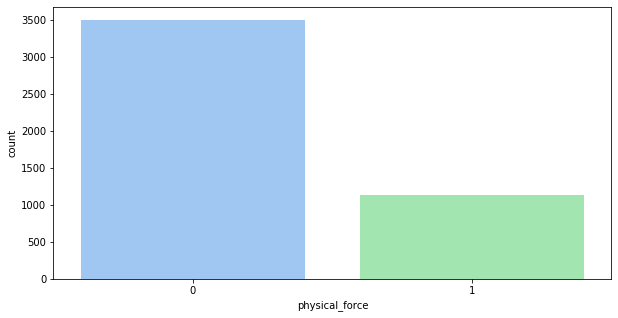

In [39]:
plt.figure(figsize=(10, 5))
sns.countplot(df_train_2['physical_force'])


In [40]:
# Nueva estructura de datos
df_train_2.shape

(4636, 67)

> __Modelos:__

En este caso vamos a intentar explorar los 6 modelos planteados a continuación.
Los hiperparámetros de los modelos serán calibrados mediante búsqueda de grilla con validaciones cruzadas (GridSeachCV), en la medida que se requiera. 

__Gradient Boosting__: 
  + param_grid={'learning_rate': [0.01, 0.1, 0.5], 'n_estimators': [50, 100, 500, 1000, 2000]}
  + 5 Validaciones Cruzadas

__Adaptive Boosting__: 
  + param_grid={'learning_rate': [0.01, 0.1, 0.5],'n_estimators': [50, 100, 500, 1000, 2000], 'subsample': [0.1,0.5,0.9]}
  + 5 Validaciones Cruzadas

__Random Forest__: 
  + n_estimators = range(20, 1000, 50)
  + max_features="log2"
  + oob_score = True

__SVC__ con Kernel __RBF__:
  + param_grid = {'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000], 'gamma': [0.0000001, 0.0001, 0.001, 0.01, 0.1, 1, 10]}
  + 5 Validaciones Cruzadas

__QDA__ (análisis cuadrático discriminante): Es probable que dejemos iniciado el hiperparámetro priors, con la probabilidad a priori del 2009.

__BernoulliNB__ (para objetivo 3) o __MultinomialNB__ (para objetivo 4): Sin modificar hiperparámetros.

> __Atributos numéricos__

Ateriormente evaluamos la posibilidad de aplicar el log a la edad, no obstante vemos que no mejora el balance de la distribución así que vamos a proceder sin aplicar logaritmo. El resto de atributos no requiere reproceso.

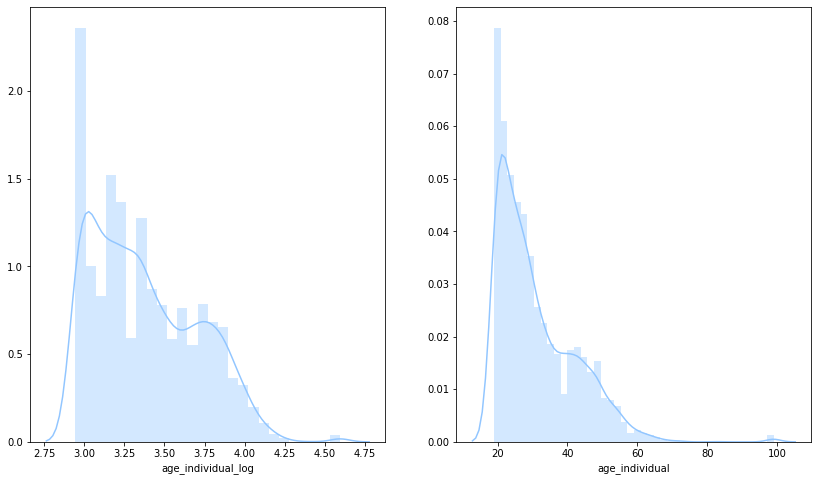

In [41]:
df_train_1['age_individual_log'] = np.log(df_train_1['age_individual'])
plt.subplot(1, 2, 1)
sns.distplot(df_train_1['age_individual_log'])
plt.subplot(1, 2, 2)
sns.distplot(df_train_1['age_individual'])

In [42]:
# Procedemos a eliminar columna _log ya que no será requerida
df_train_1.drop(columns='age_individual_log', inplace=True)

> __Atributos categóricos__ (más de dos clases)

Para evitar inflar el set de datos con columnas binarias, vamos a aplicar codificación de etiquetas con `LabelEncoder()`:

In [43]:
print(f"Columnas multiclase: {cols_cat_multiclass}")

Columnas multiclase: ['trhsloc', 'typeofid', 'sex', 'race', 'haircolr', 'eyecolor', 'build', 'city', 'sector', 'beat']


In [44]:
lenc = LabelEncoder()

In [45]:
for colname in cols_cat_multiclass:
    if colname in df_train_1.columns:
        df_train_1[colname + '_label'] = lenc.fit(df_train_1[colname]).transform(df_train_1[colname])
        df_train_1.drop(columns=colname, inplace=True)
    if colname in df_train_2.columns:
        df_train_2[colname + '_label'] = lenc.fit(df_train_2[colname]).transform(df_train_2[colname])
        df_train_2.drop(columns=colname, inplace=True)

Mantenemos las estructuras de las bases de datos

In [46]:
df_train_1.shape

(4636, 75)

In [47]:
df_train_2.shape

(4636, 67)

> __Atributos binarios__

In [48]:
# Se binarizan las columnas que tienen 2 clases
df_train_1 = pd.get_dummies(df_train_1, dummy_na=False, drop_first=True)
df_train_2 = pd.get_dummies(df_train_2, dummy_na=False, drop_first=True)

Mantenemos las estructuras de las bases de datos

In [49]:
df_train_1.shape

(4636, 75)

In [50]:
df_train_2.shape

(4636, 67)